In [21]:
#importing essential packages
import numpy as np
import pandas as pd

In [22]:
#reading dataset
df=pd.read_csv('datasets_4458_8204_winequality-red.csv')


# **1)EDA**

# A.Understanding the data

In [23]:
df.shape

(1599, 12)

In [24]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [26]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# **B.Visualizing**

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
#Finding correlation
#Issue 1: Plot a correlation heatmap (including all columns)

In [29]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


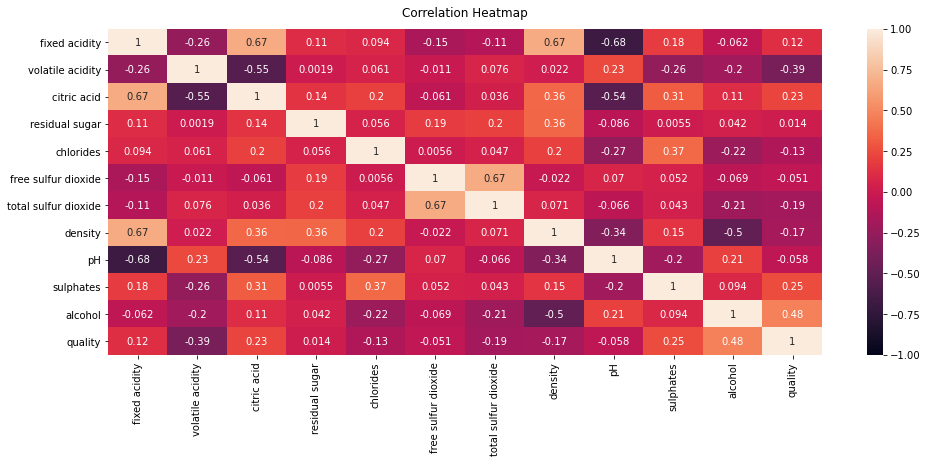

In [30]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

UNIVARIATE ANALYSIS-HISTOGRAMS:


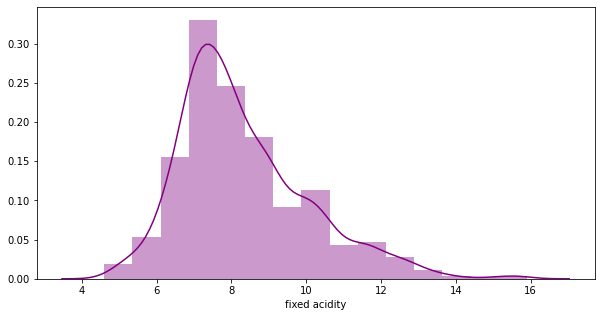

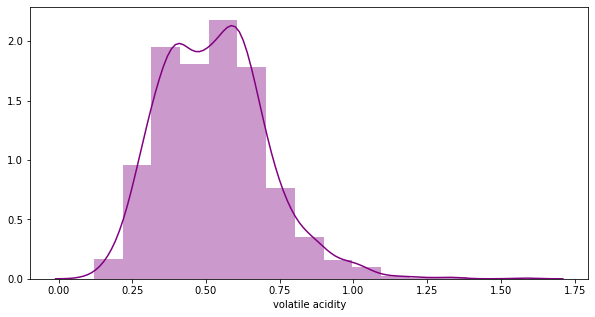

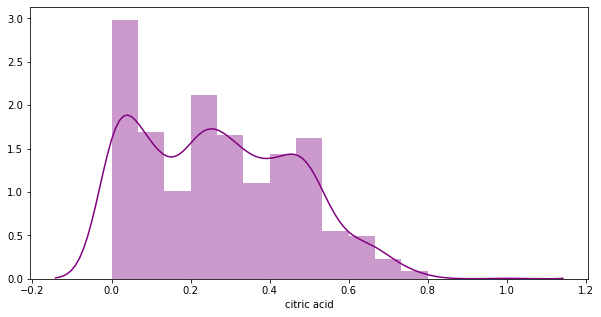

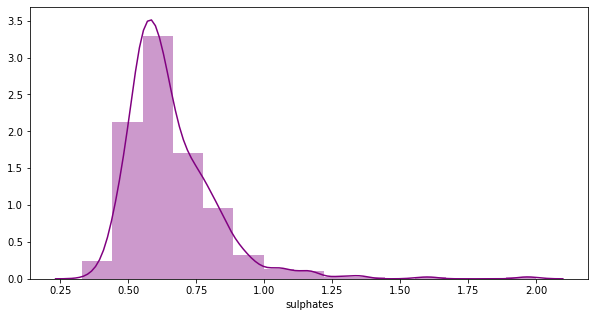

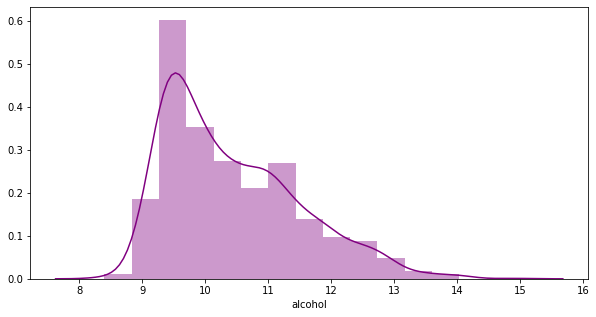

In [31]:
print("UNIVARIATE ANALYSIS-HISTOGRAMS:")
for i in [0,1,2,9,10]:
    plt.subplots(figsize=(10,5))
    sns.distplot(df.iloc[:,i],color='purple',bins=15)
    plt.show()
    

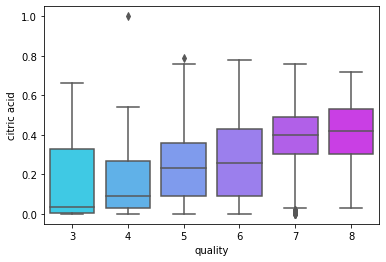

Trend: Median value of Citric acid distribution increases as Wine quality increases.


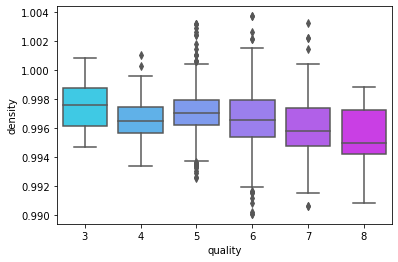

Trend: No linear trend


In [32]:
#Issue 2: A boxplot has been given by the developer only for citric acid and density. Plot similar boxplots for each of the columns against quality (using the feature 'quality' as one of the axes)
#Mention if any linear trends are clearly noticeable
sns.boxplot(x=df.iloc[:,11],y = df.iloc[:,2],palette="cool")
plt.show()
print('Trend: Median value of Citric acid distribution increases as Wine quality increases.')
sns.boxplot(x=df.iloc[:,11],y = df.iloc[:,7],palette="cool")
plt.show()
print('Trend: No linear trend')

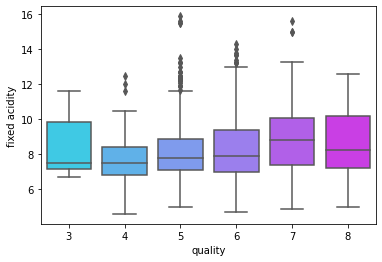

Trend: No linear trend


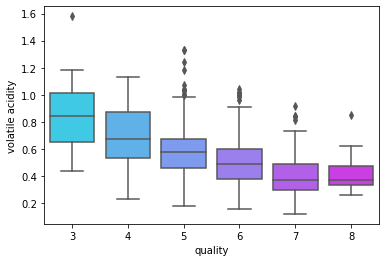

Trend: No linear trend


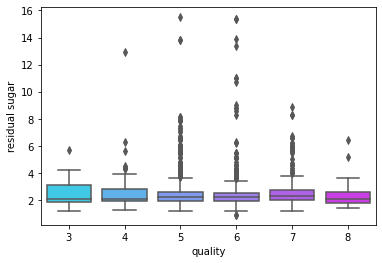

Trend: No linear trend


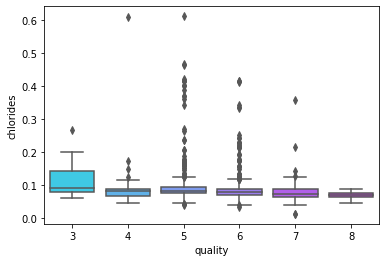

Trend: Median value of chlorides increases as Wine quality increases.


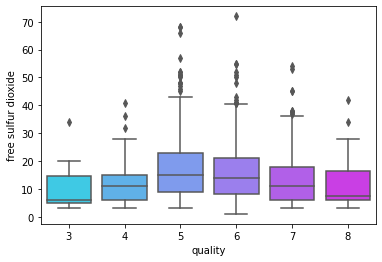

Trend:No linear trend


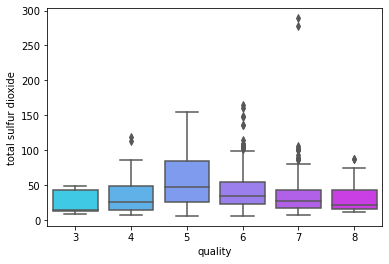

Trend:No linear trend


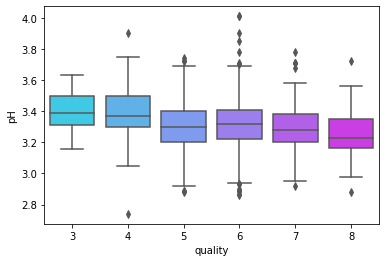

Trend:No linear trend


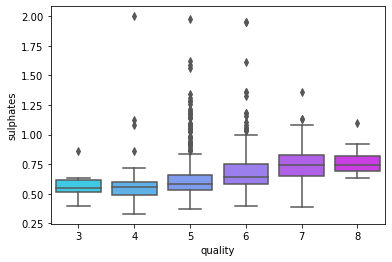

Trend:No linear trend


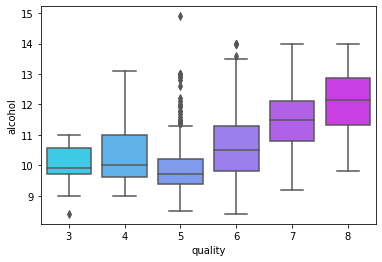

Trend: Median value of alcohol distribution increases as Wine quality increases.


In [33]:
sns.boxplot(x=df.iloc[:,11],y = df.iloc[:,0],palette="cool")
plt.show()
print('Trend: No linear trend')
sns.boxplot(x=df.iloc[:,11],y = df.iloc[:,1],palette="cool")
plt.show()
print('Trend: No linear trend')
sns.boxplot(x=df.iloc[:,11],y = df.iloc[:,3],palette="cool")
plt.show()
print('Trend: No linear trend')
sns.boxplot(x=df.iloc[:,11],y = df.iloc[:,4],palette="cool")
plt.show()
print('Trend: Median value of chlorides increases as Wine quality increases.')
sns.boxplot(x=df.iloc[:,11],y = df.iloc[:,5],palette="cool")
plt.show()
print('Trend:No linear trend')
sns.boxplot(x=df.iloc[:,11],y = df.iloc[:,6],palette="cool")
plt.show()
print('Trend:No linear trend')
sns.boxplot(x=df.iloc[:,11],y = df.iloc[:,8],palette="cool")
plt.show()
print('Trend:No linear trend')
sns.boxplot(x=df.iloc[:,11],y = df.iloc[:,9],palette="cool")
plt.show()
print('Trend:No linear trend')
sns.boxplot(x=df.iloc[:,11],y = df.iloc[:,10],palette="cool")
plt.show()
print('Trend: Median value of alcohol distribution increases as Wine quality increases.')

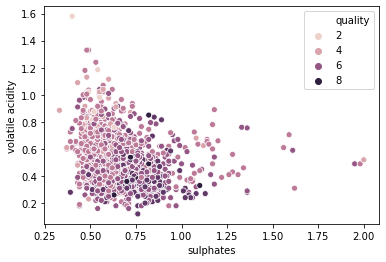

Pattern: Yes, Wine's with higher sulphates content(0.75-1.00) and lower volatile acidity(0.2-0.4) tend to have a higher quality


In [34]:
#Issue 3: Plot scatter plots amongst the feature columns (considering all possible combinations) with the hue as "quality" and mention trends/patterns if any 
#refer to the below plot for an example:

sns.scatterplot(x=df.iloc[:,9],y=df.iloc[:,1],hue=df["quality"])
plt.show()
print("Pattern: Yes, Wine's with higher sulphates content(0.75-1.00) and lower volatile acidity(0.2-0.4) tend to have a higher quality")

# **C.Feature selection and data scaling**

In [35]:
from sklearn.neighbors import KNeighborsClassifier 
y=df.iloc[:,11]
X=df.iloc[:,[1,2,9,10]] #Using only top 4 columns with highest correlation to quality

In [36]:
#Scaling the data
#Issue number 4: Scale the data (use variable name scaler1 to define the scaler)
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
X=scaler1.fit_transform(X)

# **2.Model creation**


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41,stratify=y)

In [50]:
#Issue 5: Create a KNeighbours Classifier Model with default prameters an print the accuracy on the test data 
#use variable 'model1' to instantiate your model
model1 = KNeighborsClassifier()
model1.fit(X_train,y_train)
facc=model1.score(X_test,y_test)
print("\n\nAccuracy of final model is: ", facc*100, "%\n\n")



Accuracy of final model is:  60.62499999999999 %




In [51]:
#Issue 6: In a new cell below, improve the KNN Classifier model by tuning the parameters of the KNeighboursClassifier. Do not change any of the code above. Only a model with accuracy above 74% will be accepted.

In [54]:
model1.fit(X_train, y_train)
facc=model1.score(X_test,y_test)
print("\n\nAccuracy of final model is: ", facc*100, "%\n\n")



Accuracy of final model is:  60.62499999999999 %




In [58]:
#7 Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rf1.fit(X_train, y_train)
facc=rf1.score(X_test,y_test)
print("\n\nAccuracy of final model is: ", facc*100, "%\n\n")



Accuracy of final model is:  68.125 %




In [59]:
rf2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',min_samples_split=4,class_weight="balanced")
rf2.fit(X_train, y_train)
facc=rf1.score(X_test,y_test)
print("\n\nAccuracy of final model is: ", facc*100, "%\n\n")



Accuracy of final model is:  68.125 %


